In [1]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec

In [2]:
# train_data불러오기
train = pd.read_csv("../../Data/train_data.csv")

In [3]:
train_list = []
for i in range(0, 80):
    train_list.append(train['가사'][i])

In [4]:
len(train_list)

80

---
# 토큰화1

In [5]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl = (" ".join(r).strip())
    
    results.append(rl)
    #print(rl)

In [6]:
token_list = str(results).split(" ")

In [7]:
token_list

["['Oh",
 'darling',
 '처음',
 '널',
 '만나다',
 '수줍다',
 '대화',
 '들',
 '사랑',
 '빠지다',
 'My',
 'darling',
 '아마도',
 '우린',
 '손',
 '마주',
 '잡고',
 '도시',
 '거닐다',
 '비',
 '오다',
 '골목',
 '어귀',
 '발',
 '멈추다',
 '바라보다',
 '입',
 '맞추다',
 '모르다',
 '어둠',
 '오다',
 '밝다',
 '빛나다',
 '별빛',
 '들',
 '아래',
 '음악',
 '취해',
 '서로',
 '기대다',
 'Darling',
 'My',
 'darling',
 '멈추다',
 '버리다',
 '시간',
 '속',
 '우리',
 '둘이서',
 '영원',
 'Darling',
 'My',
 'darling',
 '함께',
 '하다',
 '너',
 '곁',
 '눈',
 '감',
 '때',
 'Oh',
 'darling',
 '잊다',
 '못',
 '하다',
 '서로',
 '품',
 '안고',
 '온기',
 '느끼다',
 '날',
 'My',
 'darling',
 '따스하다',
 '함께',
 '잠',
 '들다',
 '때',
 '비추다',
 '햇살',
 '들',
 '가끔',
 '씩',
 '우린',
 '아쉽다',
 '다른',
 '모습',
 '들',
 '말',
 '멈추다',
 '어색하다',
 '침묵',
 '오다',
 '때',
 '서운하다',
 '마음',
 '다투다',
 '보다',
 '오직',
 '둘',
 '알다',
 '그렇다',
 '말',
 '들',
 '가볍다',
 '미소',
 '되다',
 'Darling',
 'My',
 'darling',
 '멈추다',
 '버리다',
 '시간',
 '속',
 '우리',
 '둘이서',
 '영원',
 'Darling',
 'My',
 'darling',
 '함께',
 '하다',
 '너',
 '곁',
 '눈',
 '감',
 '때',
 '널',
 '처음',
 '마주',
 '순간',
 '알',
 '수',
 '있다',
 '나르

In [8]:
import matplotlib.pyplot as plt

In [9]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [10]:
import nltk # national language tool kit
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

- 불용어 제거과정

In [11]:
# 불용어 추가
stop_words = []
token_ko1 = [each_word for each_word in token_list if each_word not in stop_words]
#print(token_ko1)

In [12]:
# 상위 50개 단어 확인
ko1 = nltk.Text(token_ko1)
ko1.vocab().most_common(50)

[('하다', 427),
 ('너', 356),
 ('내', 235),
 ('사랑', 211),
 ('있다', 187),
 ('나', 164),
 ('없다', 160),
 ('말', 139),
 ('보다', 128),
 ('이', 126),
 ('수', 122),
 ('그', 114),
 ('날', 107),
 ('그대', 103),
 ('우리', 101),
 ('더', 100),
 ('네', 100),
 ('널', 98),
 ('않다', 85),
 ('못', 83),
 ('같다', 83),
 ('난', 82),
 ('들', 75),
 ('것', 73),
 ('왜', 69),
 ('이별', 69),
 ('게', 66),
 ('나르다', 64),
 ('생각', 63),
 ('아프다', 62),
 ('다', 60),
 ('오다', 59),
 ('걸', 59),
 ('다시', 57),
 ('잊다', 56),
 ('되다', 54),
 ('싶다', 54),
 ('맘', 54),
 ('너무', 53),
 ('해', 52),
 ('밤', 52),
 ('시간', 50),
 ('내다', 50),
 ('알', 47),
 ('때', 46),
 ('이제', 46),
 ('사람', 46),
 ('마음', 45),
 ('보고', 44),
 ('좋다', 43)]

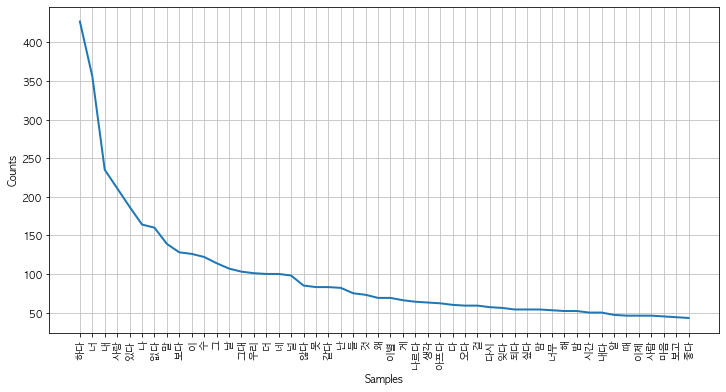

In [13]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko1.plot(50)
plt.show()

In [14]:
# 상위 50개만 wordcloud로 그리기
# 구한데이터로 그리기
data1 = ko1.vocab().most_common(50)

# 딕셔너리로 만들기
tmp_data1 = dict(data1)

wordcloud1 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data1)

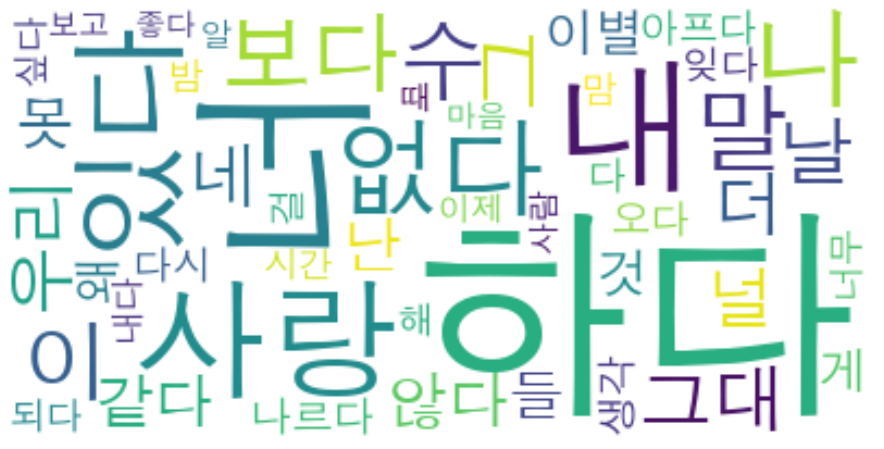

In [15]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

> 단어 분리과정 중 감정에대한 단어 판단할 기준이 모호해 다른방법으로 형태소분리를 적용해보겠습니다.

---
# 토큰화 2

In [16]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results2 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=False,stem=False) # 단어의 기본형 사용안함
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0])
    rl2 = (" ".join(r).strip())
    
    results2.append(rl2)
    #print(rl)

In [17]:
token_list2 = str(results2).split(" ")


- 불용어 체크 2

In [18]:
# 불용어 추가
stop_words2 = []
token_ko2 = [each_word for each_word in token_list2 if each_word not in stop_words2]


In [19]:
# 상위 50개 단어 확인
ko2 = nltk.Text(token_ko2)
ko2.vocab().most_common(50)

[('너', 356),
 ('내', 235),
 ('사랑', 211),
 ('나', 164),
 ('말', 139),
 ('수', 122),
 ('이', 120),
 ('그', 116),
 ('날', 107),
 ('그대', 103),
 ('우리', 101),
 ('더', 100),
 ('네', 100),
 ('널', 98),
 ('해', 90),
 ('못', 83),
 ('난', 82),
 ('들', 78),
 ('왜', 69),
 ('이별', 69),
 ('것', 67),
 ('나를', 64),
 ('생각', 63),
 ('게', 63),
 ('걸', 61),
 ('다', 60),
 ('다시', 57),
 ('맘', 54),
 ('너무', 53),
 ('밤', 52),
 ('봐', 51),
 ('시간', 50),
 ('없는', 50),
 ('알', 47),
 ('때', 46),
 ('이제', 46),
 ('내게', 46),
 ('사람', 46),
 ('마음', 45),
 ('한', 45),
 ('보고', 44),
 ('할', 42),
 ('눈', 42),
 ('오늘', 39),
 ('젠', 39),
 ('속', 38),
 ('아직', 38),
 ('I', 37),
 ('기억', 36),
 ('같아', 36)]

> 감정이 단어의 기본형만으로 느낄수 없어 기본형으로 변형하지 않고 형태소 분리를 하였더니 전혀 판단할 수 없는 데이터가 추출되었습니다.  
> 감정을 판단할때 동사가 더 직관적으로 알 수 있을것 같아서 동사만 추출해보겠습니다.

---
# 동사토큰

In [20]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results3 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if word[1] in ["Verb"]:
            if word[0] != "n":
                r.append(word[0])
    rl3 = (" ".join(r).strip())
    
    results3.append(rl)
    #print(rl)

In [21]:
token_list3 = str(results3).split(" ")

In [22]:
# 불용어 추가
stop_words3 = ['하다','찬','나','너','걸','수','다시다','내','고서','안','거','그','누구','보나','두','알','코','이','젠'\
                ,'난','해','널',',',"''",'곳',"안녕',","젤","'나르다","나다",'내다','잘',"그대","사람","하나요","안녕']"\
                ,"['나르다",
                ]
token_ko3 = [each_word for each_word in token_list3 if each_word not in stop_words3]


In [23]:
# 상위 100개 단어 확인
ko3 = nltk.Text(token_ko3)
ko3.vocab().most_common(100)

[('사랑', 720),
 ('안녕', 320),
 ('더', 240),
 ('아프다', 240),
 ('같다', 160),
 ('이미', 160),
 ('있다', 160),
 ('이별', 160),
 ('나르다', 160),
 ('만들다', 160),
 ('노래', 160),
 ('끝', 160),
 ('슬프다', 160),
 ('다시', 160),
 ('생각', 160),
 ('척', 160),
 ('아니다', 80),
 ('배우다', 80),
 ('않다', 80),
 ('늘', 80),
 ('더디다', 80),
 ('서두르다', 80),
 ('오다', 80),
 ('거리', 80),
 ('눈물', 80),
 ('짓다', 80),
 ('원래', 80),
 ('결국', 80),
 ('그땐', 80),
 ('없다', 80),
 ('바람', 80),
 ('불어오다', 80),
 ('붉다', 80),
 ('불다', 80),
 ('혼자', 80),
 ('솔직하다', 80),
 ('끝내', 80),
 ('말', 80),
 ('자리', 80),
 ('돌아오다', 80),
 ('상처', 80),
 ('받다', 80),
 ('너무', 80),
 ('두다', 80),
 ('여전하다', 80),
 ('가끔', 80),
 ('우연히', 80),
 ('만나다', 80),
 ('그냥', 80),
 ('모르다', 80),
 ('지나가다', 80),
 ('지우다', 80),
 ('끝나다', 80)]

In [24]:
len(ko3.vocab())

53

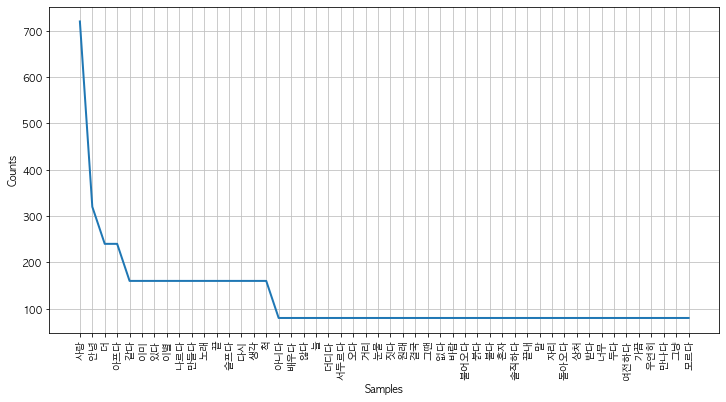

In [25]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko3.plot(50)
plt.show()

In [26]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko3.vocab().most_common(200)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

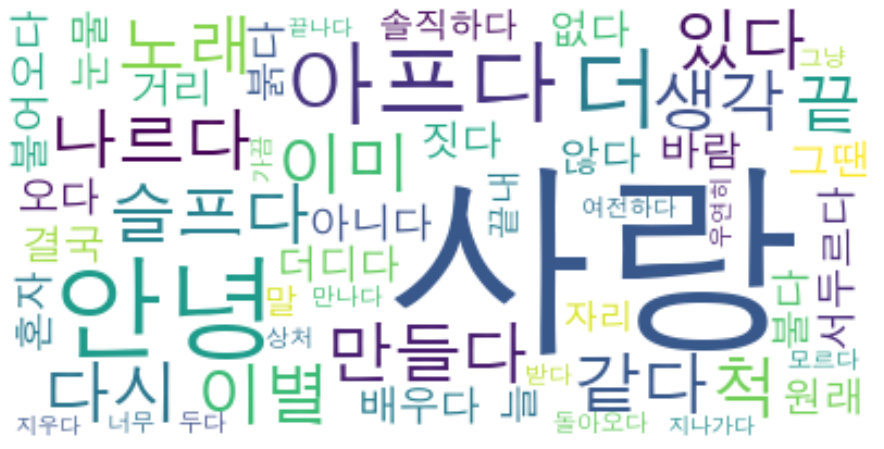

In [27]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 명사 토큰

In [28]:
# train_malist

In [29]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[1] in ["Noun"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl4 = (" ".join(r).strip())
    
    results4.append(rl4)
    #print(rl)

In [30]:
token_list4 = str(results4).split(" ")

In [31]:
# 명사갯수 (중복포함)
len(token_list4)

6680

In [32]:
# 불용어 추가
stop_words4 = ['내','너','네','우리','널','그대','넌','곳','나','수',"속","젠","게","알","해","거","미","일","우린","니","젠","때","알","걸"\
                "두","손","눈","것","이","두","볼","어디","하나요","아무","길","좀","뒤","척","안","마","모두","여기","건","비","품","번","줄"\
                ,"난난","살","그","더","난","사람","걸","'너","나나","땐","적","저기","채","입","그것","위","해도","수가","둘",\
                "듯","수',","사랑',","롤","요","저","감","'사랑","다시',","라면","은","뭐","땜","워","준","불","뿐","서서","순","울",\
                "우릴","남","발","춤","일도","란","전","온","중","말',","대도","만","낼","빈","오지","덜","방","무","진","투","드","돌",\
                "바랬는데","빗","오","보","거지","후","핀","잡","부시","거더","알',","게',","'혼자","수도","우리둘","래야","통해","'하루",\
                "애","아들","더욱더","전하","무엇","끝내기","티","겉","헤어지자","사이',","'나","'내","더',","굽","녹","테","세","'오늘",\
                "것',","'그대","그대',","너',","날',","친구","내겐","단","다가","누가","듯이","안고","물","활","첫","목","픈","바","몇",\
                "쉬","철","나라","죽","찬","지고","나로","감고","보이","운","다한","룰","식이","이면","날수","남지","만이","째깍","번이","날"
                ]
token_ko4 = [each_word for each_word in token_list4 if each_word not in stop_words4]
ko4 = nltk.Text(token_ko4)

- 명사의 경우 명사의 갯수가 1개인 경우가 총 402번이였으며 특수기호 포함이 가장 많이 들어있음을 확인하고 1번 사용된 명사는 토큰에서 제외

In [33]:
testing = []
for key, val in zip(list(ko4.vocab().keys()),list(ko4.vocab().values())):
    if val < 2:
        testing.append([key,val])

In [34]:

len(testing)

402

In [35]:
testing2 = []
for i in range(len(testing)):
    testing2.append(str(testing[i][0]))

In [36]:
# 1번 사용된 언어 지운후 다시 확인
token_ko5 = set(ko4.vocab()) - set(testing2)
token_ko6 = [each_word for each_word in token_list4 if each_word in token_ko5]
ko6 = nltk.Text(token_ko6)
ko6.vocab().most_common(500)

[('사랑', 204),
 ('말', 133),
 ('왜', 69),
 ('이별', 68),
 ('생각', 62),
 ('맘', 54),
 ('다시', 53),
 ('밤', 52),
 ('시간', 50),
 ('못', 49),
 ('이제', 46),
 ('마음', 44),
 ('보고', 43),
 ('오늘', 39),
 ('기억', 36),
 ('혼자', 35),
 ('그때', 33),
 ('끝', 32),
 ('눈물', 32),
 ('곁', 30),
 ('모습', 30),
 ('하루', 30),
 ('추억', 30),
 ('또', 30),
 ('모든', 29),
 ('정말', 29),
 ('혹시', 28),
 ('서로', 26),
 ('그날', 25),
 ('지금', 25),
 ('처음', 24),
 ('매일', 22),
 ('가슴', 22),
 ('세상', 22),
 ('꼭', 22),
 ('순간', 19),
 ('바람', 19),
 ('자꾸', 18),
 ('하나', 18),
 ('잠', 17),
 ('항상', 17),
 ('햇살', 16),
 ('멀리', 16),
 ('그게', 15),
 ('그냥', 15),
 ('후회', 15),
 ('다른', 14),
 ('전부', 14),
 ('노래', 14),
 ('그땐', 14),
 ('잡고', 13),
 ('사이', 13),
 ('소리', 13),
 ('남아', 13),
 ('만큼', 13),
 ('꿈', 12),
 ('노력', 12),
 ('사실', 12),
 ('조금', 12),
 ('마지막', 11),
 ('늘', 11),
 ('준비', 11),
 ('바보', 11),
 ('그녀', 11),
 ('술잔', 11),
 ('자꾸만', 10),
 ('반짝', 10),
 ('약속', 10),
 ('이해', 10),
 ('상처', 10),
 ('가끔', 9),
 ('옆', 9),
 ('점점', 9),
 ('글자', 9),
 ('얼굴', 9),
 ('귓가', 9),
 ('자리', 9),
 ('크리스마스', 9),


In [37]:
# 명사 토큰 갯수 (중복제외)
len(list(ko6.vocab()))

329

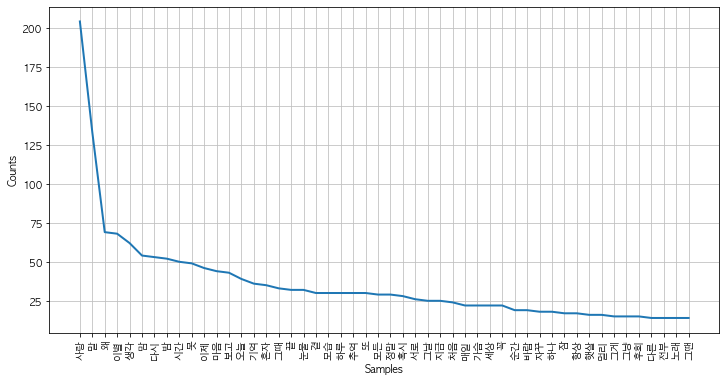

In [38]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko6.plot(50)
plt.show()

In [39]:
# 상위 100개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko6.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data4 = dict(data4)

wordcloud4 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

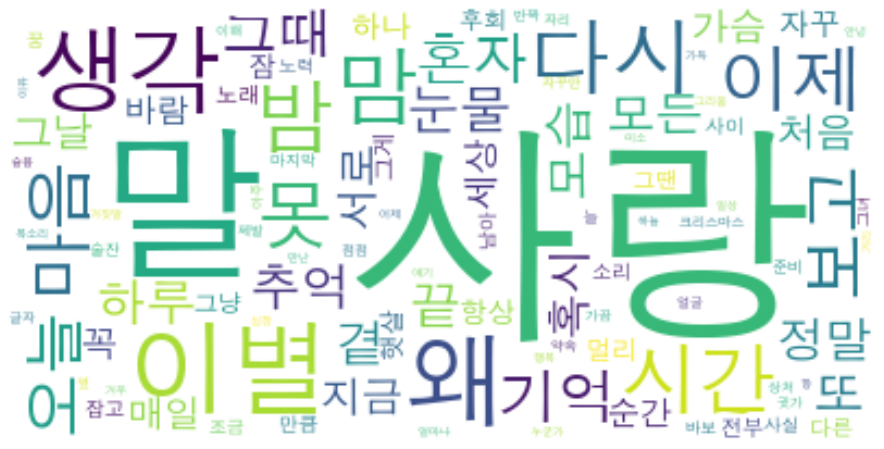

In [40]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 추출한 토큰 확인하기

In [41]:
# 동사 토큰, 명사 토큰
print("동사토큰 : \n",list(ko3.vocab())," => 동사 토큰 갯수 : ",len(list(ko3.vocab())),
"\n\n명사토큰 : \n",list(ko6.vocab())," =>명사 토큰 갯수 : ",len(list(ko6.vocab())))
print("총 합 :",len(list(ko3.vocab()))+len(list(ko6.vocab())))

동사토큰 : 
 ['사랑', '안녕', '더', '아프다', '같다', '이미', '있다', '이별', '나르다', '만들다', '노래', '끝', '슬프다', '다시', '생각', '척', '아니다', '배우다', '않다', '늘', '더디다', '서두르다', '오다', '거리', '눈물', '짓다', '원래', '결국', '그땐', '없다', '바람', '불어오다', '붉다', '불다', '혼자', '솔직하다', '끝내', '말', '자리', '돌아오다', '상처', '받다', '너무', '두다', '여전하다', '가끔', '우연히', '만나다', '그냥', '모르다', '지나가다', '지우다', '끝나다']  => 동사 토큰 갯수 :  53 

명사토큰 : 
 ['사랑', '말', '왜', '이별', '생각', '맘', '다시', '밤', '시간', '못', '이제', '마음', '보고', '오늘', '기억', '혼자', '그때', '끝', '눈물', '곁', '모습', '하루', '추억', '또', '모든', '정말', '혹시', '서로', '그날', '지금', '처음', '매일', '가슴', '세상', '꼭', '순간', '바람', '자꾸', '하나', '잠', '항상', '햇살', '멀리', '그게', '그냥', '후회', '다른', '전부', '노래', '그땐', '잡고', '사이', '소리', '남아', '만큼', '꿈', '노력', '사실', '조금', '마지막', '늘', '준비', '바보', '그녀', '술잔', '자꾸만', '반짝', '약속', '이해', '상처', '가끔', '옆', '점점', '글자', '얼굴', '귓가', '자리', '크리스마스', '아주', '제발', '얼마나', '행복', '하늘', '만난', '가득', '얘기', '안녕', '그리움', '미소', '심장', '겨우', '향', '슬픔', '거리', '목소리', '일상', '거짓말', '이유', '어제', '누군가', '종일', '만날', '마치', '영화', '이

In [42]:
token_sum = list(ko3.vocab())+list(ko6.vocab())

---
# 토큰 one hot

In [43]:
from tensorflow import keras

- 가사 데이터 okt로 분류하기

In [44]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if word[1] in ["Verb","Noun"]:
            if word[0] != "n":
                r.append(word[0])
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [45]:
# 동사와 명사로 분리가 잘 되었는지 확인하기
okt_result[0]

'처음 널 만나다 대화 사랑 빠지다 우린 손 마주 잡고 도시 거닐다 비 오다 골목 어귀 발 멈추다 바라보다 입 맞추다 모르다 어둠 오다 밝다 빛나다 별빛 아래 음악 취해 서로 기대다 멈추다 버리다 시간 속 우리 둘이서 영원 하다 너 곁 눈 감 때 잊다 하다 서로 품 안고 온기 느끼다 날 잠 들다 때 비추다 햇살 가끔 우린 다른 모습 말 멈추다 침묵 오다 때 마음 다투다 보다 오직 둘 알다 말 미소 되다 멈추다 버리다 시간 속 우리 둘이서 영원 하다 너 곁 눈 감 때 널 처음 마주 순간 알 수 나르다 보다 지다 그 미소 그게 내 부란 걸 내 마음 담다 너 고백 하다 영원 나르다 안다 너 곁 눈 감 때 눈 감 때 눈 감 때'

In [46]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [47]:
print((encoded[0]))

[84, 0, 0, 0, 0, 360, 9, 377, 0, 376, 0, 0, 264, 0, 0, 0, 212, 377, 0, 345, 0, 0, 195, 0, 326, 348, 0, 104, 262, 0, 0, 256, 0, 366, 0, 377, 0, 342, 0, 363, 377, 0, 234, 148, 0, 344, 0, 0, 367, 0, 0, 76, 377, 0, 356, 0, 300, 377, 0, 173, 0, 0, 76, 377, 0, 78, 0, 377, 0, 344, 0, 0, 363, 377, 0, 0, 377, 0, 172, 9, 377, 0, 341, 172, 0, 375, 0, 0, 0, 0, 0, 343, 0, 0, 260, 0, 0, 321, 376, 377, 0, 0, 76, 377, 0, 0, 0, 377, 0, 256, 0, 0, 0, 0, 345, 0, 0, 289, 381, 260, 0, 204, 357, 0, 335, 377, 0, 297, 0, 73, 0, 211, 0, 0, 0, 165, 0, 0, 377, 0, 335, 377, 0, 260, 0, 0, 302, 0, 198, 262, 0, 258, 321, 0, 0, 0, 377, 0, 0, 0, 329, 0, 0, 377, 0, 165, 0, 342, 76, 377, 0, 95, 0, 0, 349, 0, 0, 345, 0, 0, 377, 0, 0, 78, 291, 0, 243, 0, 0, 76, 377, 0, 0, 0, 0, 363, 377, 0, 165, 0, 326, 0, 0, 377, 0, 377, 0, 300, 377, 0, 363, 0, 0, 289, 0, 0, 377, 0, 243, 0, 327, 178, 0, 0, 377, 0, 0, 76, 377, 0, 0, 0, 377, 0, 256, 0, 0, 0, 0, 345, 0, 0, 289, 381, 260, 0, 204, 357, 0, 335, 377, 0, 297, 0, 73, 0, 211, 0, 0

---
# 전체 길이 padding작업

In [48]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 558
가사의 최소 길이 : 184
가사의 평균 길이 : 349.300000


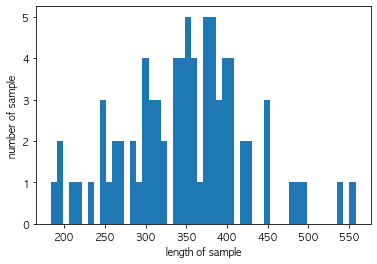

In [49]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [50]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[ 84,   0,   0, ...,   0,   0,   0],
       [294,   0,   0, ...,   0,   0,   0],
       [345,   0,   0, ...,   0,   0,   0],
       ...,
       [241,   0,   0, ...,   0,   0,   0],
       [333, 364,   0, ...,   0,   0,   0],
       [  9,   0, 377, ...,   0,   0,   0]], dtype=int32)

In [51]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

80 558


In [52]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return 1
    elif category == 'sad':
        return 2
    elif category == 'regret':
        return 3
    else:
        return 4

In [53]:
encoded_category = [category_encoding(category) for category in categories]
encoded_category

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [54]:
len(encoded_category)

80

---
# 가사 감정 RNN model

In [55]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [56]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [57]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

warnings.filterwarnings('ignore')

In [58]:
print(train_input.shape, val_input.shape)

(51, 558) (13, 558)


In [59]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(8, input_shape=(558, 383)))
model.add(keras.layers.Dense(4, activation='softmax')) # 문장은 확률값을 구해야하므로

In [60]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(51, 558, 383)

In [61]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(13, 558, 382)

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 3136      
                                                                 
 dense (Dense)               (None, 4)                 36        
                                                                 
Total params: 3,172
Trainable params: 3,172
Non-trainable params: 0
_________________________________________________________________


In [63]:
import numpy as np

In [67]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=20,
    batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/tj/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/tj/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/tj/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/tj/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/tj/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/51/xmc_l6t13wv1nc5z6qmyg58r0000gn/T/ipykernel_3809/788277040.py", line 14, in <module>
      history = model.fit(
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 4 which is outside the valid range of [0, 4).  Label values: 4 4 1 2 3 4 2 4 3 1 3 4 1 2 2 1 4 3 3 4 1 4 1 4 3 3 2 4 3 4 1 1 1 4 2 1 3 3 1 4 3 3 4 2 4 2 3 1 1 2 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_3873]

In [ ]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history_cnn.history['loss'])
ax1.plot(history_cnn.history['val_loss'])
ax2.plot(history_cnn.history['accuracy'])
ax2.plot(history_cnn.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()

---
# 가사 감정 LSTM

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Embedding(max_length, 16, input_length=100))
model.add(keras.layers.LSTM(8, dropout=0.3)) # 8개의 셀을 사용한다, 드롭아웃 0.3 넣기
model.add(keras.layers.Dense(4, activation='softmax'))

model.summary()

In [ ]:
# 훈련하기
# rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics ='accuracy'
    ) 

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train-lstm-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)

history = model.fit(
    np.array(train_input),
    np.array(train_target),
    epochs=100, # RNN에서 제일 작은게 100임.
    batch_size = 64,  # mini batch 경사하강법
    validation_data = (np.array(val_input), np.array(val_target)),
    callbacks = [checkpoint_cb, early_stopping_cb]
)